In [4]:
import pandas as pd
import mysql.connector as mysql
# from sqlalchemy import create_engine

In [3]:
# host="localhost",
# user="root",
# username="root",
# # password=input("Enter the password"),
# password="Mama@1234$$",
# database="project",
# port = 3306

In [5]:
mydb = mysql.connect(
  host="localhost",
  user="root",
  username="root",
  # password=input("Enter the password"),
  password="Mama@1234$$",
  database="project",
  allow_local_infile=True
)


mycursor = mydb.cursor()
x=("SHOW DATABASES;") 
mycursor.execute(x)
for db in mycursor.fetchall():
    print(db[0])
# mycursor.execute("SELECT DATABASE()")
# database_name = mycursor.fetchone()
# print('Available Databases', mycursor.execute("SELECT DATABASE()"))
# print("You are connected to the database: ", database_name)

information_schema
learning
lu
mysql
performance_schema
project
sakila
sys
world


In [7]:
mycursor.execute("use project")
# mycursor.fetchall()
mycursor.execute("select database()")
curr_db = mycursor.fetchall()


In [8]:
# df = pd.read_csv("../cleandata/all_hospitals.csv", header=0)
# table_name = 'all_hosp'

# columns = list(df.columns)
# a = f"CREATE TABLE {table_name} ({','.join([f'{col} VARCHAR(255)' for col in columns])})"
# a

In [9]:
df = pd.read_csv("../cleandata/all_hospitals.csv", header=0)
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '_')
table_name = 'all_hospitals'

columns = list(df.columns)
sql_query = f"CREATE TABLE {table_name} ({','.join([f'{col} VARCHAR(255)' for col in columns])})"

mycursor.execute(sql_query)

for _, row in df.iterrows():
    sql_query = f"INSERT INTO {table_name} ({','.join(columns)}) VALUES ({','.join(['%s']*len(columns))})"
    values = tuple(row)
    mycursor.execute(sql_query, values)

mydb.commit()
mycursor.close()

print(f"{len(df)} rows inserted into {table_name}")


C:\Users\Miles\AppData\Local\Temp\ipykernel_12688\4266159376.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '_')


ProgrammingError: 1050 (42S01): Table 'all_hospitals' already exists

In [ ]:
mycursor = mydb.cursor()

In [ ]:
df = pd.read_csv("../cleandata/census_clean.csv", header=0)
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '_')
table_name = 'census_clean'

columns = list(df.columns)
sql_query = f"CREATE TABLE {table_name} ({','.join([f'{col} VARCHAR(255)' for col in columns])})"

mycursor.execute(sql_query)

for _, row in df.iterrows():
    sql_query = f"INSERT INTO {table_name} ({','.join(columns)}) VALUES ({','.join(['%s']*len(columns))})"
    values = tuple(row)
    mycursor.execute(sql_query, values)

mydb.commit()
mycursor.close()

print(f"{len(df)} rows inserted into {table_name}")

C:\Users\Miles\AppData\Local\Temp\ipykernel_10948\1510970523.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '_')


ProgrammingError: 1050 (42S01): Table 'census_clean' already exists

In [ ]:
mycursor = mydb.cursor()

In [ ]:
df = pd.read_csv("../cleandata/government_hospital.csv", header=0)
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '_')
df.fillna(0, inplace=True)
table_name = 'government_hospital'

columns = list(df.columns)
sql_query = f"CREATE TABLE {table_name} ({','.join([f'{col} VARCHAR(255)' for col in columns])})"

mycursor.execute(sql_query)

for _, row in df.iterrows():
    sql_query = f"INSERT INTO {table_name} ({','.join(columns)}) VALUES ({','.join(['%s']*len(columns))})"
    values = tuple(row)
    mycursor.execute(sql_query, values)

mydb.commit()
mycursor.close()

print(f"{len(df)} rows inserted into {table_name}")

37 rows inserted into government_hospital


C:\Users\Miles\AppData\Local\Temp\ipykernel_10948\211224457.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '_')


In [ ]:
df = pd.read_csv("../cleandata/housing_clean.csv", header=0)
df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '_')
df.fillna(0, inplace=True)
table_name = 'housing'

columns = list(df.columns)
sql_query = f"CREATE TABLE {table_name} ({','.join([f'{col} VARCHAR(255)' for col in columns])})"

mycursor.execute(sql_query)

for _, row in df.iterrows():
    sql_query = f"INSERT INTO {table_name} ({','.join(columns)}) VALUES ({','.join(['%s']*len(columns))})"
    values = tuple(row)
    mycursor.execute(sql_query, values)

mydb.commit()
mycursor.close()

print(f"{len(df)} rows inserted into {table_name}")

635 rows inserted into housing


C:\Users\Miles\AppData\Local\Temp\ipykernel_10948\3614071828.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df.columns = df.columns.str.replace('[^a-zA-Z0-9]', '_')


###Problem Statement 19: (Verify upload)
Verification is a necessary process to be followed after uploading the data.
Join all the tables using the respective primary key- foreign key pair and show the top 3 rows. 
Verify whether the result is as expected or not. If not, then identify and fix the issue.


In [ ]:
mycursor.execute("use project")
mycursor.execute("""Select * 
from all_hospitals as hosp
JOIN census_clean as cen
ON cen.State_UT = hosp.State_UT
JOIN government_Hospital as gov
ON	gov.State_UT = hosp.State_UT
JOIN housing as house
ON house.State_UT = gov.State_UT limit 3""")
for db in mycursor.fetchall():
    print(db)

('Andhra Pradesh', '1417', '198', '31', '20', '1666', '60799', 'Andhra Pradesh', 'Adilabad', '2741239.0', '1369597.0', '1371642.0', '1483347.0', '856350.0', '626997.0', '597466.0', '220248.0', '817714.0', '1536378.0', '704551.0', '422522.0', '77788.0', 'Andhra Pradesh', '193', '6480', '65', '16658', '2017-01-01', 'Andhra Pradesh', 'Adilabad', '82450', '155715', '38835', '6166', '213295', '51758', '597466', '220248')
('Andhra Pradesh', '1417', '198', '31', '20', '1666', '60799', 'Andhra Pradesh', 'Anantapur', '4081148.0', '2064495.0', '2016653.0', '2310960.0', '1338474.0', '972486.0', '902997.0', '341431.0', '1244428.0', '2189396.0', '1104565.0', '739612.0', '47575.0', 'Andhra Pradesh', '193', '6480', '65', '16658', '2017-01-01', 'Andhra Pradesh', 'Adilabad', '82450', '155715', '38835', '6166', '213295', '51758', '597466', '220248')
('Andhra Pradesh', '1417', '198', '31', '20', '1666', '60799', 'Andhra Pradesh', 'Chittoor', '4174064.0', '2090204.0', '2083860.0', '2667878.0', '1484794.0'

##Problem Statement 20: (Run Query on the database and use in python)
Write a query that finds the number of households without a toilet on the premise for each district of the state that has the least hospital bed-to-population ratio. 
Display the information using python.



In [ ]:
mycursor.execute("use project")
mycursor.execute("""Select State_UT, District,(Households_Rural+Households_Urban)-(Households_Urban_Toilet_Premise + Households_Rural_Toilet_Premise) as "without_toilet_on_premise"
from housing
where State_UT = 'Bihar' """)
for db in mycursor.fetchall():
    print(db)

# engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')
# query="""Select State_UT, District,(Households_Rural+Households_Urban)-(Households_Urban_Toilet_Premise + Households_Rural_Toilet_Premise) as "without_toilet_on_premise" 
# from housing
# where State_UT = 'Bihar' """

# df = pd.read_sql_query(query, engine)
# print(df)

('Bihar', 'Araria', 635110.0)
('Bihar', 'Arwal', 110185.0)
('Bihar', 'Aurangabad', 359987.0)
('Bihar', 'Banka', 388570.0)
('Bihar', 'Begusarai', 501713.0)
('Bihar', 'Bhagalpur', 428343.0)
('Bihar', 'Bhojpur', 369769.0)
('Bihar', 'Buxar', 251015.0)
('Bihar', 'Darbhanga', 749103.0)
('Bihar', 'Gaya', 606107.0)
('Bihar', 'Gopalganj', 441305.0)
('Bihar', 'Jamui', 302891.0)
('Bihar', 'Jehanabad', 154122.0)
('Bihar', 'Kaimur (Bhabua)', 282558.0)
('Bihar', 'Katihar', 605366.0)
('Bihar', 'Khagaria', 299684.0)
('Bihar', 'Kishanganj', 397737.0)
('Bihar', 'Lakhisarai', 140943.0)
('Bihar', 'Madhepura', 443017.0)
('Bihar', 'Madhubani', 884676.0)
('Bihar', 'Munger', 186398.0)
('Bihar', 'Muzaffarpur', 807622.0)
('Bihar', 'Nalanda', 423983.0)
('Bihar', 'Nawada', 327804.0)
('Bihar', 'Pashchim Champaran', 787512.0)
('Bihar', 'Patna', 550920.0)
('Bihar', 'Purba Champaran', 1011930.0)
('Bihar', 'Purnia', 686615.0)
('Bihar', 'Rohtas', 434506.0)
('Bihar', 'Saharsa', 390897.0)
('Bihar', 'Samastipur', 853732.0

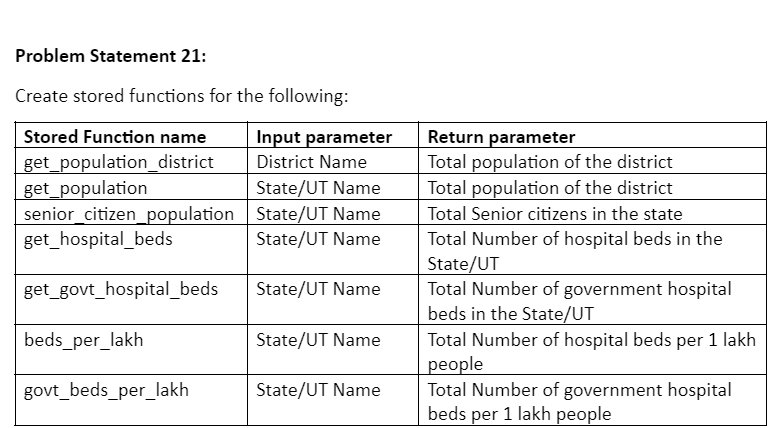

FUNCTION FOR DISTRICT NAME

In [ ]:

# mycursor = mydb.cursor()
# x21 = ("""CREATE FUNCTION Get_population_district(district_name VARCHAR(255))
# RETURNS INT 
# DETERMINISTIC
# BEGIN 
# DECLARE total_population INT ;SELECT SUM(population) INTO total_population
# FROM census_clean WHERE district = district_name;
# RETURN total_population;
# END;""")
# mycursor.execute(x21)
# curr_x21 = mycursor.fetchall()
# print(x21)

x21a = "SELECT get_population_district('Nalgonda');"
mycursor.execute(x21a)
result = mycursor.fetchall()
print(result)


[(3488809,)]


FUNCTION FOR STATE/UT

In [ ]:
# mycursor = mydb.cursor()
# b21 = ("""CREATE FUNCTION Get_population(State_name VARCHAR(255))
#  RETURNS INT 
#  DETERMINISTIC
#  BEGIN 
#  DECLARE total_population INT ;SELECT SUM(population) INTO total_population
#  FROM census_clean WHERE State_UT = State_name;
#  RETURN total_population;
#  END;""")

# mycursor.execute(b21)
# curr_b21 = mycursor.fetchall()
# print(b21)

b21b = "SELECT get_population('Bihar');"
mycursor.execute(b21b)
result = mycursor.fetchall()
print(result)

[(104099452,)]


Function For Senior citizens

In [ ]:
# mycursor = mydb.cursor()
# c21 = ("""CREATE FUNCTION Senior_Citizen_Population(state_name VARCHAR(255))
#   RETURNS INT 
#   DETERMINISTIC
#   BEGIN 
#   DECLARE total_senior_citizen INT ;SELECT SUM(Senior_Citizen) INTO total_senior_citizen 
#   FROM census_clean WHERE State_UT = State_name;
#   RETURN total_senior_citizen ;
#   END;""")

# mycursor.execute(c21)
# curr_c21 = mycursor.fetchall()
# print(c21) 

c21c = "SELECT Senior_Citizen_Population ('Karnataka');"
mycursor.execute(c21c)
result = mycursor.fetchall()
print(result)

[(10632806,)]


Function For Total Number of government hospital beds in the State/UT

In [ ]:
# mycursor = mydb.cursor()
# d21 = ("""CREATE FUNCTION get_govt_hospital_beds(state_name VARCHAR(255))
#   RETURNS INT 
#   DETERMINISTIC
#   BEGIN 
#   DECLARE total_government_hospital_beds INT ;
#   SELECT SUM(Rural_Government_Beds+Urban_Government_Beds) INTO total_government_hospital_beds 
#   FROM government_hospital WHERE State_UT = State_name;
#   RETURN total_government_hospital_beds ;
#   END;""")

# mycursor.execute(d21)
# curr_d21 = mycursor.fetchall()
# print(d21) 

d21d = "SELECT get_govt_hospital_beds ('Karnataka');"
mycursor.execute(d21d)
result = mycursor.fetchall()
print(result)

[(70165,)]


Function For get_hospital_beds

In [ ]:
# mycursor = mydb.cursor()
# e21 = ("""CREATE FUNCTION get_hospital_beds(state_name VARCHAR(255))
#   RETURNS INT 
#   DETERMINISTIC
#   BEGIN 
#   DECLARE total_hospital_beds INT ;
#   SELECT SUM(HospitalBeds) INTO total_hospital_beds 
#   FROM all_hospitals WHERE State_UT = State_name;
#   RETURN total_hospital_beds ;
#   END;""")

# mycursor.execute(e21)
# curr_e21 = mycursor.fetchall()
# print(e21) 

e21e = "SELECT get_hospital_beds ('Karnataka');"
mycursor.execute(e21e)
result = mycursor.fetchall()
print(result)

[(56333,)]


Function For Total Number of hospital beds per 1 lakh people

In [ ]:
# mycursor = mydb.cursor()
# f21 = ("""CREATE FUNCTION beds_per_lakh(state_name VARCHAR(255))
#   RETURNS INT 
#   DETERMINISTIC
#   BEGIN 
#   DECLARE total_hospital_beds_per1lak INT ;
#   SELECT ((hosp.HospitalBeds/sum(cen.population))*100000) INTO total_hospital_beds_per1lak
#   FROM all_hospitals as hosp
#   join Census_clean as cen
#   on cen.State_UT = hosp.State_UT
#   WHERE cen.State_UT = State_name 
#   group by cen.State_UT, hosp.HospitalBeds;
#   RETURN total_hospital_beds_per1lak ;
#   END;""")

# mycursor.execute(f21)
# curr_f21 = mycursor.fetchall()
# print(f21) 

f21f = "SELECT beds_per_lakh ('Tamil Nadu');"
mycursor.execute(f21f)
result = mycursor.fetchall()
print(result)

[(101,)]


Function For gov_beds_per_lakh

In [2]:


g21 = ('''
CREATE FUNCTION govt_beds_per_lakh(state VARCHAR(255)) 
RETURNS INT
DETERMINISTIC 
BEGIN 
  DECLARE total_beds_per_lakh INT;  
  SELECT ROUND(((g.rural_government_beds+g.urban_government_beds))/(c.population )*100000) INTO total_beds_per_lakh
  FROM government_hospital g
  JOIN (
        SELECT State_UT, SUM(population) AS population FROM census_clean 
        GROUP BY State_UT
      ) c
  ON c.State_UT=g.State_UT
  WHERE c.State_UT=state;
  RETURN total_beds_per_lakh;
END;
''')


# mycursor.execute(g21)



In [3]:
# mycursor.nextset()
mycursor.execute(g21)
# mycursor.nextset()

# mycursor = mydb.cursor()
g21g = "SELECT govt_beds_per_lakh('Bihar');"
# mycursor.nextset()
mycursor.execute(g21g)
result = mycursor.fetchall()

print(result[0])


NameError: name 'mycursor' is not defined

Problem Statement 22: 
It was reported* that in the north-eastern states, senior citizens are facing some issues in getting beds in a government hospital. Amir, from the department of healthcare, has requested a report on the healthcare situation in the north-eastern states.

The north-eastern states are listed in (Data/north_east_states.txt). Read the file and extract the state names using python and write a query to find the following information about those states from the database. Use the stored functions created earlier wherever relevant.
State Name
Population
Senior Citizen Population
Number of Government Hospital
Number of Government Hospital Beds
Number of Government Hospital beds for 1 Lakh population 
(Round the number to the nearest integer)
Number of Government Hospital beds for 1 Lakh senior citizen
(Round the number to the nearest integer)

The rows should be sorted by the number of Government Hospital beds for 1 Lakh senior citizens in ascending order.


In [6]:
north_east_states = pd.read_csv('../cleandata/NorthEast.csv',header=None)
north_east_states = north_east_states.squeeze()
north_east_states= tuple(north_east_states)

query22= f"select State_UT as State_Name,  get_population(State_UT) as Population, senior_citizen_population(State_UT) as Senior_Citizen_Population, sum((Rural_Government_Hospitals+Urban_Government_Hospitals)) as Number_of_Government_Hospitals, get_govt_hospital_beds(State_UT) as Number_of_Gov_Hospital_Beds, govt_beds_per_lakh(State_UT) as Number_of_Gov_Hospital_Beds_per_1_lakh,  round(govt_beds_per_lakh(State_UT)*sum(population)/senior_citizen_population(State_UT),2) as Number_of_Gov_Hospital_Beds_for_1_lakh_senior_citizen   from Mergedtable where State_UT in {north_east_states} group by State_UT order by govt_beds_per_lakh(State_UT)*sum(population)/senior_citizen_population(State_UT);"

mycursor.execute("COMMIT")
mycursor.execute(query22)
result = mycursor.fetchall()

print(result)






[('Manipur', 2855794, 409796, 270.0, 1427, 50, 348.44), ('Assam', 31205576, 4127732, 33102.0, 17142, 55, 415.8), ('Tripura', 3673917, 568604, 620.0, 4417, 120, 775.36), ('Nagaland', 1978502, 211983, 396.0, 1880, 95, 886.66), ('Mizoram', 1097206, 144061, 720.0, 1997, 182, 1386.16), ('Meghalaya', 2966889, 287754, 1099.0, 4457, 150, 1546.58), ('Arunachal Pradesh', 1383727, 139635, 3488.0, 2404, 174, 1724.27)]


In [7]:
df = pd.DataFrame(result, columns=['State_UT','Population','Senior_Citizen','Num_Govt_Hospitals','Num_Govt_Hospital_Beds','Num_Beds_Per_100k_Population','Num_Beds_Per_100k_Senior_Citizen'])
df

,State_UT,Population,Senior_Citizen,Num_Govt_Hospitals,Num_Govt_Hospital_Beds,Num_Beds_Per_100k_Population,Num_Beds_Per_100k_Senior_Citizen
0,Manipur,2855794,409796,270.0,1427,50,348.44
1,Assam,31205576,4127732,33102.0,17142,55,415.80
2,Tripura,3673917,568604,620.0,4417,120,775.36
3,Nagaland,1978502,211983,396.0,1880,95,886.66
4,Mizoram,1097206,144061,720.0,1997,182,1386.16
5,Meghalaya,2966889,287754,1099.0,4457,150,1546.58
6,Arunachal Pradesh,1383727,139635,3488.0,2404,174,1724.27


Problem Statement 23: 
The Government wants to run a scheme that would help people build in-premise toilets. 
For that purpose, a secretary has requested a district-wise report using the census data.

Using a stored procedure, Create a district-wise report that shows the total population of each district, the total number of households in the district, the number of households that do NOT have on-premise toilets, and the percentage of the number of households that do NOT toilets in premise to the total number of households. Sort the data in a way that is most useful for the secretary.


In [10]:
query23 = ("""
   CREATE PROCEDURE not_on_premise(districts varchar(30)) begin select District,(Households_Rural+Households_Urban)-(Households_Rural_Toilet_Premise+Households_Urban_Toilet_Premise) as no_on_premise from housing where District=districts; END;'
""")
mycursor.execute("COMMIT")
mycursor.execute(query23)
result = mycursor.fetchall()

print(result)


ProgrammingError: 1304 (42000): PROCEDURE not_on_premise already exists

In [11]:
query24 =("""CREATE PROCEDURE relationship(district VARCHAR(30))
BEGIN
    SELECT c.District, c.Population,
           ROUND((h.Households_Rural_Livable + h.Households_Urban_Livable) / (c.Population / 1000), 2) AS Livable_Houses_per_1000,
           ROUND(h.Households_Urban_Dilapidated / (c.Population / 1000), 2) AS Dilapidated_Households_per_1000
    FROM census_clean c
    JOIN housing h ON c.State_UT = h.State_UT AND c.District = h.District
    WHERE c.District = district;
END;""")
mycursor.execute("COMMIT")
mycursor.execute(query24)
result = mycursor.fetchall()

print(result)


[]


Problem Statement 25: 
The rural development department has requested a report on the healthcare situation in rural areas as compared to urban areas.
Write a query to find the number of hospital beds and government hospital beds per 1 lakh people for rural and urban areas separately for each state, along with the difference between them. 


In [31]:
query25 =("""SELECT c.State_UT,
       ROUND((h.HospitalBeds) / SUM(c.Population) * 100000) AS Hospital_Beds_per_1L_People,
       ROUND(g.Rural_Government_Beds / SUM(c.Population) * 100000) AS Rural_Government_Hospital_Beds_per_1L_People,
       ROUND(g.Urban_Government_Beds / SUM(c.Population) * 100000) AS Urban_Government_Hospital_Beds_per_1L_People,
       ROUND((g.Urban_Government_Beds - g.Rural_Government_Beds) / SUM(c.Population) * 100000) AS Difference_Government_Hospital_Beds_per_1L_People
FROM census_clean c
JOIN all_hospitals h ON c.State_UT = h.State_UT
JOIN government_hospital g ON c.State_UT = g.State_UT
GROUP BY c.State_UT, g.Rural_Government_Beds, g.Urban_Government_Beds,h.HospitalBeds;""")
mycursor.execute("COMMIT")
mycursor.execute(query25)
result = mycursor.fetchall()

print(result)


[('Andhra Pradesh', 72.0, 8.0, 20.0, 12.0), ('Arunachal Pradesh', 168.0, 154.0, 19.0, -135.0), ('Assam', 61.0, 35.0, 20.0, -15.0), ('Bihar', 17.0, 6.0, 6.0, -0.0), ('Chandigarh', 356.0, 0.0, 74.0, 74.0), ('Chhattisgarh', 56.0, 20.0, 17.0, -3.0), ('Goa', 183.0, 96.0, 110.0, 14.0), ('Gujarat', 68.0, 19.0, 34.0, 15.0), ('Haryana', 55.0, 26.0, 18.0, -8.0), ('Himachal Pradesh', 127.0, 83.0, 98.0, 16.0), ('Jharkhand', 22.0, 18.0, 15.0, -3.0), ('Karnataka', 92.0, 35.0, 80.0, 46.0), ('Kerala', 118.0, 50.0, 63.0, 13.0), ('Lakshadweep', 388.0, 465.0, 0.0, -465.0), ('Madhya Pradesh', 53.0, 14.0, 26.0, 12.0), ('Maharashtra', 61.0, 11.0, 35.0, 24.0), ('Manipur', 90.0, 26.0, 24.0, -1.0), ('Meghalaya', 155.0, 66.0, 84.0, 17.0), ('Mizoram', 211.0, 55.0, 127.0, 72.0), ('Nagaland', 98.0, 32.0, 63.0, 31.0), ('Punjab', 49.0, 21.0, 44.0, 23.0), ('Rajasthan', 76.0, 31.0, 16.0, -15.0), ('Sikkim', 188.0, 43.0, 213.0, 170.0), ('Tamil Nadu', 101.0, 56.0, 52.0, -4.0), ('Tripura', 133.0, 31.0, 89.0, 58.0), ('Utta

In [32]:
df = pd.DataFrame(result, columns=['State_UT','Hospital_Beds_per_1L_People','Rural_Government_Hospital_Beds_per_1L_People','Urban_Government_Hospital_Beds_per_1L_People','Difference_Government_Hospital_Beds_per_1L_People'])
df

,State_UT,Hospital_Beds_per_1L_People,Rural_Government_Hospital_Beds_per_1L_People,Urban_Government_Hospital_Beds_per_1L_People,Difference_Government_Hospital_Beds_per_1L_People
0,Andhra Pradesh,72.0,8.0,20.0,12.0
1,Arunachal Pradesh,168.0,154.0,19.0,-135.0
2,Assam,61.0,35.0,20.0,-15.0
3,Bihar,17.0,6.0,6.0,-0.0
4,Chandigarh,356.0,0.0,74.0,74.0
5,Chhattisgarh,56.0,20.0,17.0,-3.0
6,Goa,183.0,96.0,110.0,14.0
7,Gujarat,68.0,19.0,34.0,15.0
8,Haryana,55.0,26.0,18.0,-8.0
9,Himachal Pradesh,127.0,83.0,98.0,16.0



Problem Statement 26: 
New hospitals are under construction* in different locations, and once they are constructed the data in the database is to be updated. Also, when some hospitals non-operational hospital might be removed. Since the data is quite significant there should be a hospital_log table that would store any changes made to the hospital or government_hospital table.
The hospital_log table should contain the name of the district, whether the hospital is situated in urban or rural area, whether the hospital is being added or being removed, date of adding or removing the hospital to/from the existing facilities, and whether it is government hospital or not. The a row in the table must be added automatically whenever a new hospital is added, or an existing hospital is removed. 


In [34]:
mycursor.execute("""
CREATE TABLE hospital_log(
  State_UT varchar(30),
  urban_rural enum('rural','urban'),
  added_removed enum('added','removed'),
  action_date date,
  govermnet_private enum('government','private'));
"""
)


In [36]:
query26 =("""select * from hospital_log;
delimiter //
CREATE TRIGGER update_government_hospital_trigger
AFTER update ON government_hospital
FOR EACH ROW
BEGIN
declare rural_urban varchar(30);
declare added_removed varchar(30);
	IF  new.Rural_Government_Hospitals-old. Rural_Government_Hospitals > 0 THEN
		set rural_urban='rural';
        set added_removed='Added';
	ELSE
		set rural_urban='rural';
        set added_removed='Removed';
	END IF;
    IF  new.Urban_Government_Hospitals-old.Urban_Government_Hospitals > 0 THEN
		set rural_urban='urban';
        set added_removed='Added';
	ELSE
		set rural_urban='urban';
        set added_removed='Removed';
	END IF;
    
INSERT INTO hospital_log (State_UT, urban_rural, added_removed, action_date, government_private)
VALUES (OLD.`State/UT`, rural_urban,added_removed, CURDATE(), 'governmet');
END//
""")
mycursor.execute("COMMIT")
mycursor.execute(query26)
result = mycursor.fetchall()

print(result)


[]


Problem Statement 27:
New hospital beds are to be added in different government and private hospitals in different locations, and some non-operational hospital beds might be removed from hospitals. Since the data is quite significant there should be a hospital_bed_log table that would store any changes made to the hospital or government_hospital table with respect to number of hospital beds.
The hospital_bed_log table should contain the name of the district, whether the hospital is situated in urban or rural area, date of adding or removing hospital beds, the number of beds being added or removed, whether it is being added or removed and whether it is added to/removed from government hospital or not. The table must be updated automatically whenever new hospital beds are added to or removed from the existing facility.


In [41]:
mycursor.execute("COMMIT")
mycursor.execute("""
CREATE TABLE hospital_bed_log(
State_UT varchar(30),
rural_urban varchar(30),
added_removed varchar(30),
action_date date,
no_of_beds int,
government_private varchar(30)
) 

"""
)

DatabaseError: 2014 (HY000): Commands out of sync; you can't run this command now

In [42]:
query = ("""CREATE TRIGGER update_all_hospital_beds_trigger
AFTER update ON all_hospitals
FOR EACH ROW
BEGIN
	declare urban_rural varchar(30);
	declare added_removed varchar(30);
	declare no_of_beds int;
	if new.Rural_Government_Beds -old.Rural_Government_Beds >0 then
		set added_removed='added';
		set no_of_beds=new.Rural_Government_Beds -old.Rural_Government_Beds;
		set urban_rural='rural';
    else
		set added_removed='removed';
		set no_of_beds=old.Rural_Government_Beds -new.Rural_Government_Beds;
		set urban_rural='rural';
	end if;
	if new.Urban_Government_Beds -old.Urban_Government_Beds >0 then
		set added_removed='added';
		set no_of_beds=new.Urban_Government_Beds -new.Urban_Government_Beds;
		set urban_rural='urban';
    else
		set added_removed='removed';
		set no_of_beds=old.Urban_Government_Beds -new.Urban_Government_Beds;
		set urban_rural='urban';
	end if;
INSERT INTO hospital_bed_log (State_UT, urban_rural, added_removed, action_date,no_of_beds, government_private)
VALUES (OLD.`State/UT`, urban_rural, added_removed, CURDATE(),no_of_beds,'goverment');
END//""")
mycursor.execute("COMMIT")
mycursor.execute(query26)
result = mycursor.fetchall()

print(result)


DatabaseError: 2014 (HY000): Commands out of sync; you can't run this command now